## Part A – Theoretical Foundation (Short Notes & Explanation)

### 1. What is Inferential Statistics?
Inferential statistics is the branch of statistics that uses sample data to make conclusions or predictions about a larger population.  
It involves estimation, hypothesis testing, and drawing generalizations with a certain level of confidence.

### 2. What is Hypothesis Testing and Its Components?
Hypothesis testing is a statistical method used to decide whether there is enough evidence to reject a null hypothesis about a population parameter.  
Main components: Null hypothesis (H₀), Alternative hypothesis (H₁), Significance level (α), Test statistic, and p-value.

### 3. Explain Confidence Interval and Critical Value.
A confidence interval is a range of values used to estimate a population parameter with a certain confidence level (e.g., 95%).  
A critical value is a threshold value that determines whether the test statistic falls in the rejection region of the hypothesis test.

### 4. Define p-value.
The p-value is the probability of obtaining a result as extreme as the observed result, assuming the null hypothesis is true.  
If the p-value is less than the significance level (α), the null hypothesis is rejected.

### 5. Differentiate Type I and Type II Errors.
Type I error occurs when a true null hypothesis is rejected (false positive).  
Type II error occurs when a false null hypothesis is not rejected (false negative).

### 6. Brief Descriptions of z-test, t-test, chi-square test, and ANOVA test.
- **z-test**: Used to compare means when the population standard deviation is known and sample size is large.  
- **t-test**: Used to compare means when the population standard deviation is unknown and sample size is small.  
- **Chi-square test**: Used to test relationships between categorical variables or goodness of fit.  
- **ANOVA (Analysis of Variance)**: Used to compare the means of three or more groups.

### 7. What is Covariance?
Covariance measures the direction of the linear relationship between two variables.  
A positive covariance indicates variables move in the same direction, while a negative value indicates opposite movement.

### 8. What is Correlation?
Correlation measures both the strength and direction of the linear relationship between two variables.  
It ranges from -1 to +1, where values closer to ±1 indicate a stronger relationship.


## Part B : DATA ANALYSIS & TESTING TASK

In [99]:
import pandas as pd
import numpy as np
import math
from scipy import stats
df = pd.read_csv(r"D:\AI & ML\Maths\milan sir\health_records.csv")
df.head()

,record_id,age_group,age,weight,gender,region,smoking_status,exercise_frequency,bmi,blood_pressure,cholesterol_level,glucose_level,diabetes,hypertension,visit_date
0,R001,18-25,22,62,Male,North,Non-Smoker,Daily,21.5,118,170,88,False,False,2025-01-12
1,R002,26-35,31,78,Female,South,Former Smoker,Weekly,26.2,130,210,110,True,True,2025-02-05
2,R003,36-45,40,85,Male,East,Smoker,Rarely,29.4,145,240,130,True,True,2025-02-18
3,R004,46-60,52,72,Female,West,Non-Smoker,Weekly,25.1,135,220,105,True,True,2025-03-01
4,R005,60+,67,68,Male,North,Former Smoker,Never,27.8,150,260,140,True,True,2025-03-10


## 1.Formulate Hypotheses

### Hypothesis 1: Smoking vs Diabetes
- H0: Smoking has no effect on diabetes.
- H1: Smoking affects diabetes.

### Hypothesis 2: Cholesterol vs Diabetes
- H0: Mean cholesterol is same for both groups.
- H1: Mean cholesterol differs.


## 2. Confidence Interval

In [100]:
mean_age = df['age'].mean()
n = len(df['age'])
variance = ((df['age'] - mean_age) ** 2).sum() / (n - 1)
std = variance ** 0.5
SE = std / math.sqrt(n)
confidence_level = 0.95
z_critical = 1.96  
lower_ci = mean_age - z_critical * SE
upper_ci = mean_age + z_critical * SE
(lower_ci, upper_ci)

f"We are 95% confident that the true age mean lies between {lower_ci:.2f} and {upper_ci:.2f}"


'We are 95% confident that the true age mean lies between 36.64 and 49.36'

In [101]:
mean_weight = df['weight'].mean()
n = len(df['weight'])
variance = ((df['weight'] - mean_weight) ** 2).sum() / (n - 1)
std = variance ** 0.5
SE = std / math.sqrt(n)
confidence_level = 0.95
z_critical = 1.96  
lower_ci = mean_weight - z_critical * SE
upper_ci = mean_weight + z_critical * SE
(lower_ci, upper_ci)

f"We are 95% confident that the true weight mean lies between {lower_ci:.2f} and {upper_ci:.2f}"


'We are 95% confident that the true weight mean lies between 70.69 and 79.07'

In [102]:
mean_bmi = df['bmi'].mean()
n = len(df['bmi'])
variance = ((df['bmi'] - mean_bmi) ** 2).sum() / (n - 1)
std = variance ** 0.5
SE = std / math.sqrt(n)
confidence_level = 0.95
z_critical = 1.96  
lower_ci = mean_bmi - z_critical * SE
upper_ci = mean_bmi + z_critical * SE
(lower_ci, upper_ci)

f"We are 95% confident that the true bmi mean lies between {lower_ci:.2f} and {upper_ci:.2f}"


'We are 95% confident that the true bmi mean lies between 25.02 and 27.74'

## 3.Find the Critical Value and p-value to interpret the test results.

## 4. z-test or t-test based on sample size (mean comparison across groups).

In [103]:
diabetes_yes = df[df['diabetes'] == True]['cholesterol_level']
diabetes_no = df[df['diabetes'] == False]['cholesterol_level']

t_score, p_value = stats.ttest_ind(diabetes_yes, diabetes_no)
alpha = 0.05
df1 = len(df) - 2
critical_t = stats.t.ppf(1 - alpha/2, df=df1)

print('T-statistic:', t_score)
print('Critical Value:', critical_t)
print('P-value:', p_value)
print('Decision:', 'Reject H0' if p_value < alpha else 'Fail to Reject H0')

T-statistic: 6.348192408897972
Critical Value: 2.0686576104190406
P-value: 1.7730777784142828e-06
Decision: Reject H0


## 5.Conduct a chi-square test

In [129]:
observed = pd.crosstab(df['smoking_status'], df['diabetes']).values

print("Observed Table:\n", observed)

row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
grand_total = observed.sum()

expected = np.outer(row_totals, col_totals) / grand_total

print("\nExpected Table:\n", expected)
chi_square_stat = ((observed - expected) ** 2 / expected).sum()
r, c = observed.shape
df_chi = (r - 1) * (c - 1)
alpha = 0.05

p_value = 1 - stats.chi2.cdf(chi_square_stat, df_chi)
critical_value = stats.chi2.ppf(1 - alpha, df_chi)

if chi_square_stat > critical_value:
    decision = "Reject H0 (Smoking and Diabetes are related)"
else:
    decision = "Fail to Reject H0 (Variables are independent)"

print("\nChi-Square Statistic:", chi_square_stat)
print("Degrees of Freedom:", df_chi)
print("p-value:", p_value)
print("Critical Value:", critical_value)
print("Decision:", decision)


Observed Table:
 [[2 5]
 [8 2]
 [0 8]]

Expected Table:
 [[2.8 4.2]
 [4.  6. ]
 [3.2 4.8]]

Chi-Square Statistic: 12.380952380952383
Degrees of Freedom: 2
p-value: 0.0020488508776682623
Critical Value: 5.991464547107979
Decision: Reject H0 (Smoking and Diabetes are related)


## 6.Perform an ANOVA test

In [110]:
alpha = 0.05
groups = [group['bmi'].values for name, group in df.groupby('age_group')]


In [111]:
all_data = np.concatenate(groups)
grand_mean = np.mean(all_data)

SSB = sum(len(g) * (np.mean(g) - grand_mean)**2 for g in groups)
SSW = sum(sum((g - np.mean(g))**2) for g in groups)

k = len(groups)
N = len(all_data)

df_between = k - 1
df_within = N - k

MSB = SSB / df_between
MSW = SSW / df_within

F_statistic = MSB / MSW

print("Grand Mean:", grand_mean)
print("SSB:", SSB)
print("SSW:", SSW)
print("MSB:", MSB)
print("MSW:", MSW)
print("F-statistic:", F_statistic)


Grand Mean: 26.38
SSB: 158.57600000000016
SSW: 131.124
MSB: 39.64400000000004
MSW: 6.5562
F-statistic: 6.0467953997742665


In [112]:
print(*groups, sep='\n')


[21.5 20.3 24.  19.9 22.1]
[26.2 30.5 28.3 32.1 26.5]
[29.4 24.6 26.7 23.9 30.7]
[25.1 31.2 24.8 27.  24.9]
[27.8 23.4 29.9 28.5 30.2]


In [113]:
F_auto, p_value = stats.f_oneway(*groups)

F_auto, p_value

(np.float64(6.046795399774259), np.float64(0.002336125929918301))

## 7.Calculate Covariance and Correlation

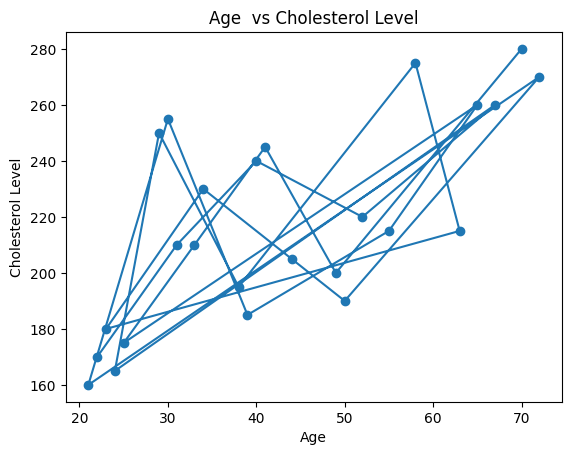

In [121]:
import matplotlib.pyplot as plt

plt.plot(df['age'], df['cholesterol_level'], marker="o")
plt.title("Age  vs Cholesterol Level")
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")
plt.show()


In [124]:
from scipy.stats import spearmanr, rankdata

X = df['age'].values       
Y = df['cholesterol_level'].values       

n = len(X)

mean_X = X.mean()
mean_Y = Y.mean()

cov_manual = ((X - mean_X) * (Y - mean_Y)).sum() / (n - 1)

numerator = ((X - mean_X) * (Y - mean_Y)).sum()

denominator = np.sqrt(
    ((X - mean_X)**2).sum() *
    ((Y - mean_Y)**2).sum()
)

r_manual = numerator / denominator

cov_numpy = np.cov(X, Y)[0, 1]
r_numpy = np.corrcoef(X, Y)[0, 1]

r_scipy, p_value = stats.pearsonr(X, Y)

print("Mean of Age:", mean_X)
print("Mean of Cholesterol Level:", mean_Y)

print("\nManual Covariance:", cov_manual)
print("NumPy Covariance:", cov_numpy)

print("\nManual Correlation (r):", r_manual)
print("NumPy Correlation:", r_numpy)
print("SciPy Correlation:", r_scipy)
print("P-value:", p_value)

if r_manual > 0:
    relation = "Positive Linear Relationship"
elif r_manual < 0:
    relation = "Negative Linear Relationship"
else:
    relation = "No Linear Relationship"

print("\nRelationship:", relation)


Mean of Age: 43.0
Mean of Cholesterol Level: 218.4

Manual Covariance: 402.7083333333333
NumPy Covariance: 402.7083333333333

Manual Correlation (r): 0.680837233501259
NumPy Correlation: 0.680837233501259
SciPy Correlation: 0.6808372335012589
P-value: 0.00017975740747465485

Relationship: Positive Linear Relationship


## 8. Clearly state the result and interpretation (Accept/Reject H₀) of each test performed. 
 - t-test: Reject H₀ → Cholesterol levels differ significantly between diabetic and non-diabetic patients.

 - Chi-square test: Reject H₀ → Smoking status and diabetes are significantly related.